In [1]:
import numpy as np
from numpy import cos, sin, pi, random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['font.size'] = 14
mycmap = ListedColormap(["blue","red","gold" ])


from scipy.stats import ortho_group

# !mkdir DATA

In [2]:
np.random.seed(12345)

Lprime = 9

M = ortho_group.rvs(Lprime)
print(M)
print(np.dot(M, M.T))
print(np.linalg.det(M))

[[-0.07558356  0.05453349  0.24189567 -0.51753451  0.13644007 -0.65993002
   0.31532638 -0.0807395   0.32385896]
 [ 0.17683873  0.36686648  0.17556122 -0.15928875 -0.3338858   0.45742103
  -0.01031938 -0.00207167  0.67610494]
 [-0.19179071  0.31341778  0.18593459  0.22503986  0.68739668 -0.02270964
  -0.48786914 -0.12237059  0.23184094]
 [-0.20519053 -0.38044089 -0.44264745  0.1892578   0.34868231  0.1866009
   0.44177481  0.08075199  0.4725687 ]
 [ 0.72581891  0.04611715 -0.03789072  0.2944144   0.14935878 -0.11139793
   0.2252749  -0.54520298  0.01522997]
 [ 0.51448281  0.04293822  0.03338496  0.09154537  0.1891877  -0.15770164
  -0.02228373  0.81211238  0.05730408]
 [ 0.03430408  0.40620029 -0.06607715 -0.42731231  0.40980637  0.41818668
   0.39113403  0.031482   -0.38738127]
 [ 0.10402824  0.26200709 -0.81397947 -0.2801779  -0.06961692 -0.20700761
  -0.35084399 -0.05369021  0.07612726]
 [ 0.28394376 -0.61794194  0.10333085 -0.51397259  0.2119505   0.25477675
  -0.37411071 -0.106465

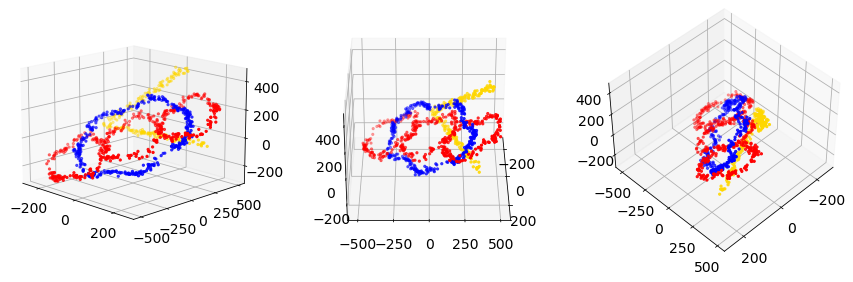

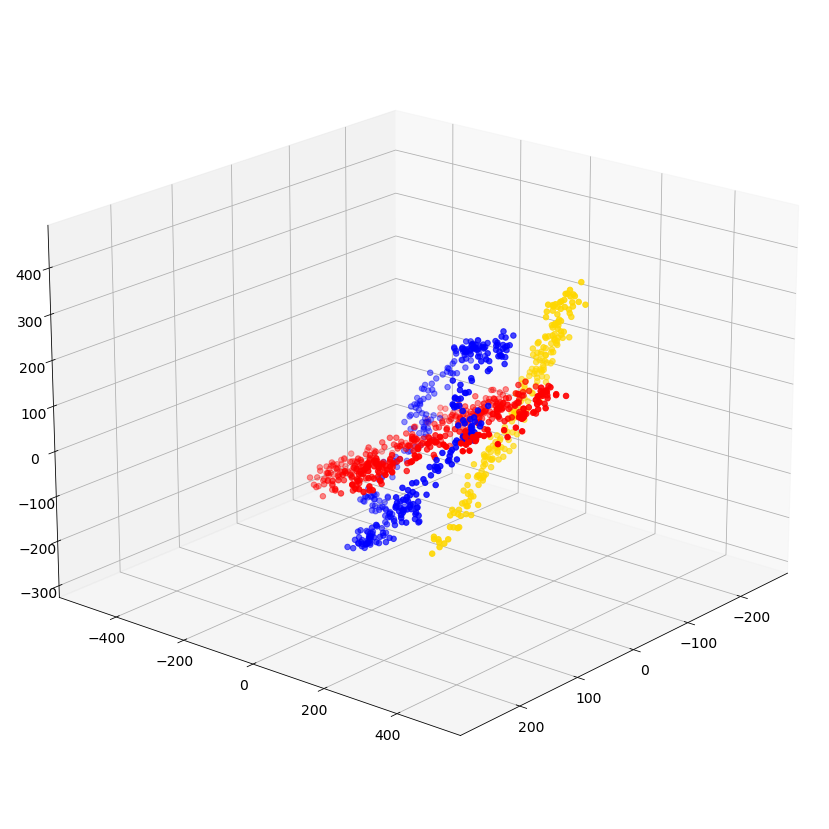

In [3]:
np.random.seed(12345)
# number of data samples
N=1000

# size of each sample
L=3

#  % of points in cluster 0 and 1
p0,p1=35,45

# radii for 3d construction
R0=800
R1=400
x,y,r,noise=np.zeros((N,L)),np.zeros(N),np.random.randint(0,100,N),np.random.randn(N,Lprime)*10


for n in range(N):
    if r[n]<p0:
        y[n]=0
        q = random.rand()*2*pi
        x[n,:3] = (R0*cos(q), R0*sin(q), -(R0/10)*cos(6*q))
    elif r[n]<p1+p0:
        y[n]=1
        q = random.rand()*2*pi
        x[n,:3] = (-(R1/5)*sin(4*q), R1*cos(q), R1*sin(q))
        x[n,:3] = x[n,:3] + R0*np.array((0,random.randint(3) - 1, 0))
    else:
        y[n]=2
        q = random.rand()*1000.
        x[n,:3] = ((random.randint(2)-0.5)*2*q, 1.333*q-R1, 1.333*R1-0.333*q)

new_columns = np.zeros((N, Lprime-L))
x = np.dot(np.hstack((x, new_columns)) + noise , M)
y = y.astype(int)



fig = plt.figure(figsize=(15, 5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    ax.scatter(x[:,0], x[:,1],x[:,2], s=5, c=y, depthshade=True, cmap=mycmap)
    ax.view_init(15+15*i, 45*(i-1))
plt.draw()

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1],x[:,2], s=30, c=y, depthshade=True, cmap=mycmap)
ax.view_init(20, 40)
plt.draw()

np.savetxt(f"DATA/x_{Lprime}d.dat",x,delimiter='\t')
np.savetxt(f"DATA/y_{Lprime}d.dat",y,fmt="%d")

x0=np.copy(x)

In [4]:
new_columns.shape

(1000, 6)

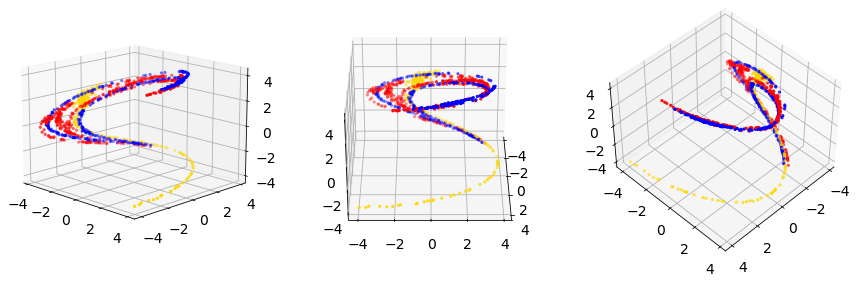

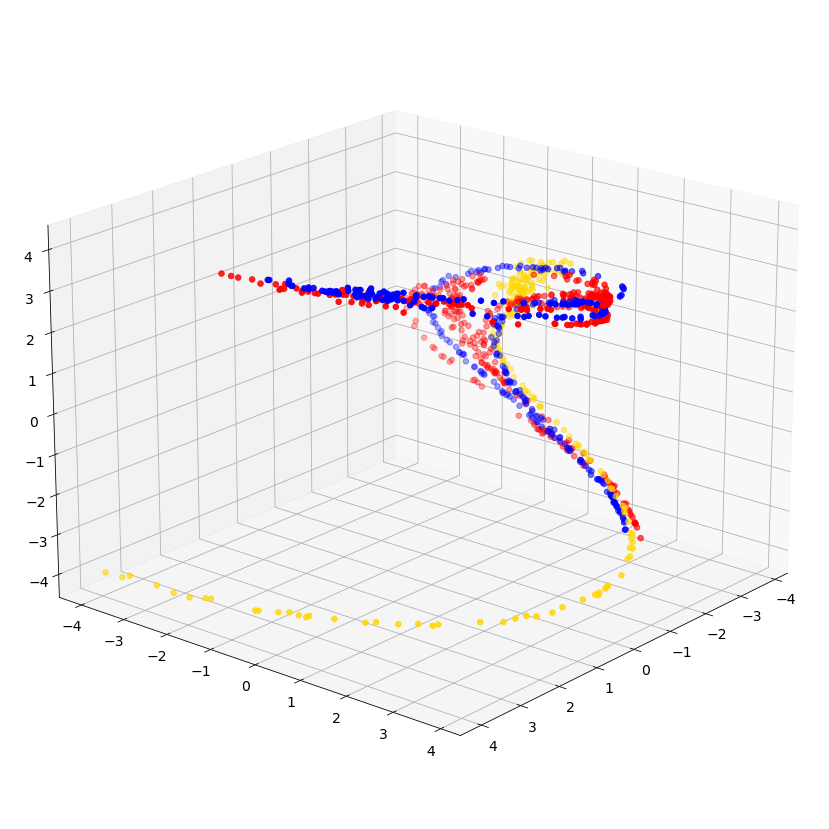

In [5]:
def deform(x,ii):
    M,m =np.max(x,axis=0),np.min(x,axis=0)
    D=M-m
    X = np.copy(x)
    X[:,ii] = (X[:,ii] - m[ii])/D[ii]

    q = pi*X[:,ii[0]]
    R = 3+X[:,ii[1]]
    X[:,ii[0]] = R*cos(q)
    X[:,ii[1]] = 2*R*sin(q)-R
    X[:,ii[2]] = 8*(X[:,ii[2]] - 0.5)
    return X

x=deform(x0,[2,0,1])
x=deform(x,[0,1,2])

fig = plt.figure(figsize=(15, 5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    ax.scatter(x[:,0], x[:,1],x[:,2], s=5, c=y, depthshade=True, cmap=mycmap)
    ax.view_init(15+15*i, 45*(i-1))
plt.draw()

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1],x[:,2], s=30, c=y, depthshade=True, cmap=mycmap)
ax.view_init(20, 40)
plt.draw()

np.savetxt("DATA/x_def_3d.dat",x,delimiter='\t')
np.savetxt("DATA/y_def_3d.dat",y,fmt="%d")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3c8e8699-579b-4f24-9413-a98afebf04a2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>